In [1]:
import aFunctions
from importlib import reload
from statsmodels.formula.api import ols, logit
from statsmodels.api import add_constant
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score
from aFunctions import *
init_notebook_mode(connected=True)

# Workbook Summary:

- Perform Time Series Statistical Stationarity Tests & ACF / PACF Tests
- Explore Indicators & Plot Indicators
- Plot a series of technical signals and test on Absolute Returns & Relative Returns
- Fit Basic Models for Train/Test Sets, with the preview of our subsiquent notebook that will focus on feature selection & importance

In [2]:
tickers = np.array(['SPY', 'TLT',
                    'XLY', 'XLP', 'XLE', 'XLF', 'XLV', 'XLI', 'XLB', 'XLK', 'XLU'])

In [22]:
np.log([1.02,.98,.88,1.08,1.24])

array([ 0.01980263, -0.02020271, -0.12783337,  0.07696104,  0.21511138])

In [45]:
reload(aFunctions)
from aFunctions import *
start_date = datetime(2017,1,1)
end_date = datetime.today()
df = GetMkt(tickers, start_date, end_date, freq = 'daily', bmark_tick = 'SPY')

SPY (660, 24) 2017-01-03 00:00:00
TLT (660, 24) 2017-01-03 00:00:00
XLY (660, 24) 2017-01-03 00:00:00
XLP (660, 24) 2017-01-03 00:00:00
XLE (660, 24) 2017-01-03 00:00:00
XLF (660, 24) 2017-01-03 00:00:00
XLV (660, 24) 2017-01-03 00:00:00
XLI (660, 24) 2017-01-03 00:00:00
XLB (660, 24) 2017-01-03 00:00:00
XLK (660, 24) 2017-01-03 00:00:00
XLU (660, 24) 2017-01-03 00:00:00
(7260, 24) 2019-08-16 00:00:00 2017-01-03 00:00:00


In [42]:
list(df.columns)

['Pxln',
 'adjClose',
 'adjHigh',
 'adjLow',
 'adjOpen',
 'adjVolume',
 'clRtn',
 'clRtnH010',
 'clRtnH021',
 'clRtnH063',
 'clRtnH126',
 'clRtnH252',
 'close',
 'date',
 'divCash',
 'high',
 'index',
 'low',
 'open',
 'relPxln',
 'relRtn',
 'splitFactor',
 'ticker',
 'volume']

In [48]:
for column in df:
    if df[column].isnull().any():
        print('{0} has {1} null values'.format(column, df[column].isnull().sum()))

clRtnH010 has 99 null values
clRtnH021 has 220 null values
clRtnH063 has 682 null values
clRtnH126 has 1375 null values
clRtnH252 has 2761 null values


In [47]:
df.pivot(columns='ticker')['clRtnH021'].describe()

ticker         SPY         TLT         XLB         XLE         XLF  \
count   640.000000  640.000000  640.000000  640.000000  640.000000   
mean      0.000477    0.000302    0.000263   -0.000210    0.000322   
std       0.001574    0.001257    0.001967    0.002684    0.002111   
min      -0.005576   -0.002798   -0.007720   -0.009235   -0.007370   
25%      -0.000240   -0.000506   -0.000621   -0.001724   -0.000889   
50%       0.000784    0.000256    0.000540   -0.000204    0.000528   
75%       0.001446    0.001103    0.001517    0.001441    0.001708   
max       0.005995    0.005322    0.005577    0.007429    0.007289   

ticker         XLI         XLK         XLP         XLU         XLV         XLY  
count   640.000000  640.000000  640.000000  640.000000  640.000000  640.000000  
mean      0.000366    0.000795    0.000313    0.000465    0.000466    0.000602  
std       0.002114    0.002081    0.001545    0.001506    0.001676    0.001867  
min      -0.006812   -0.006595   -0.004998   -0.004613   -0.006377   -0.006390  
25%      -0.000825   -0.000238   -0.000501   -0.000396   -0.000614   -0.000224  
50%       0.000600    0.001050    0.000531    0.000653    0.000713    0.000824  
75%       0.001725    0.002245    0.001483    0.001555    0.001573    0.001693  
max       0.007119    0.006667    0.004139    0.004927    0.004704    0.007216

Text(0.5, 1.0, 'Daily Relative Returns')

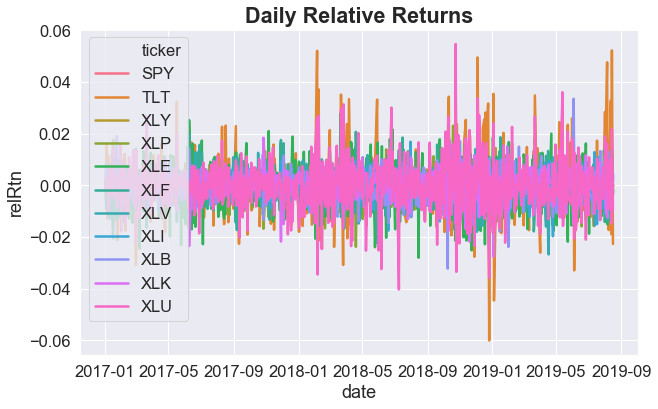

In [26]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(10,6)})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
snslp = sns.lineplot(x='date', y='relRtn',
                     hue="ticker",
                     data=df)
plt.title("Daily Relative Returns", weight='bold', size = 'large')

Text(0.5, 1.0, 'Close Adjusted Prices')

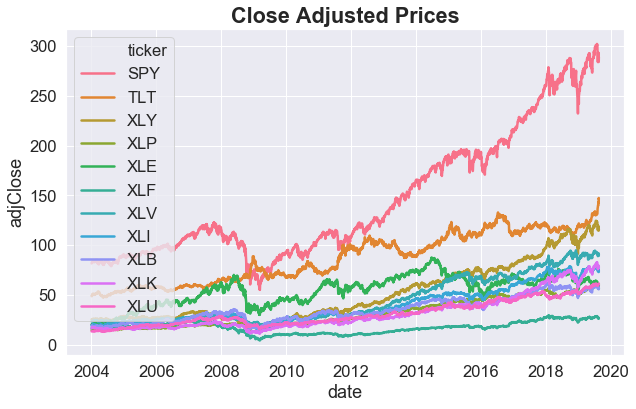

In [18]:
snslp = sns.lineplot(x='date', y='adjClose',
             hue="ticker",
             data=df)

plt.title("Close Adjusted Prices", weight='bold', size = 'large')

Text(0.5, 1.0, 'Absolute Returns')

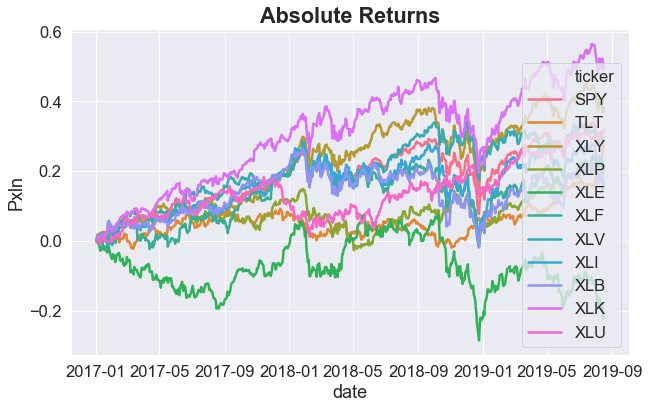

In [27]:
snslp = sns.lineplot(x='date', y='Pxln',
             hue="ticker",
             data=df)

plt.title("Absolute Returns", weight='bold', size = 'large')

Text(0.5, 1.0, 'Rel to SPY Returns')

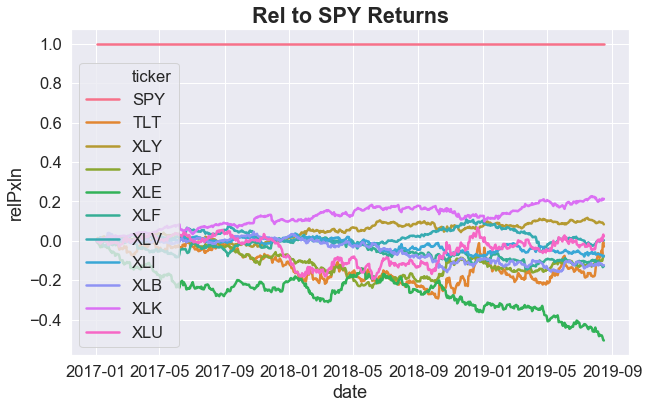

In [28]:
snslp = sns.lineplot(x='date', y='relPxln',
             hue="ticker",
             data=df)

plt.title("Rel to SPY Returns", weight='bold', size = 'large')

# ADF tests on Weekly Returns:

- Results on price or timeseries of Cumulative returns
- Results on weekly absolute returns
- weekly relative returns to SPY
- weekly cummulative relative returns

In [15]:
list(df.columns)

['adjClose',
 'adjHigh',
 'adjLow',
 'adjOpen',
 'adjVolume',
 'close',
 'creturns',
 'date',
 'divCash',
 'high',
 'index',
 'low',
 'open',
 'preturns',
 'rreturns',
 'rreturns-d',
 'splitFactor',
 'tcreturns',
 'ticker',
 'volume']

In [16]:
adf = pd.DataFrame([], index = ['ADF', 'pval', 'ulag', 'n', 'cval'])

#t[3].resols.summary()
for i in tickers[:]:
    c = df[df['ticker'] == i]['tcreturns']
    t = list(adfuller(c, maxlag=1, regression='c', autolag = None, regresults=False))
    adf[i+' - Price'] = t[:5]
    c = df[df['ticker'] == i]['creturns']
    t = list(adfuller(c, maxlag=1, regression='c', autolag = None, regresults=False))
    adf[i+' - Absolute'] = t[:5]
    if i =='SPY':
        continue
    c = df[df['ticker'] == i]['rreturns-d']
    t = list(adfuller(c, maxlag=1, regression='c', autolag = None, regresults=False))
    adf[i+' - Relative'] = t[:5]
    c = df[df['ticker'] == i]['rreturns']
    t = list(adfuller(c, maxlag=1, regression='c', autolag = None, regresults=False))
    adf[i+' - CIX'] = t[:5]
    
adf = adf.T
adf['1%'] = np.round(adf['cval'][0]['1%'],3)
adf['5%'] = np.round(adf['cval'][1]['5%'],3)
adf['10%'] = np.round(adf['cval'][2]['10%'],3)
print('ADF Test Results on Weekly Returns:')
adf.drop('cval', axis=1)

ADF Test Results on Weekly Returns:


ADF       pval ulag     n     1%     5%    10%
SPY - Price     0.891948   0.992984    1  3926 -3.432 -2.862 -2.567
SPY - Absolute  -49.6347          0    1  3926 -3.432 -2.862 -2.567
XLY - Price      1.38967   0.997067    1  3926 -3.432 -2.862 -2.567
XLY - Absolute  -46.4376          0    1  3926 -3.432 -2.862 -2.567
XLY - Relative  -48.7243          0    1  3926 -3.432 -2.862 -2.567
XLY - CIX       -0.28446   0.927677    1  3926 -3.432 -2.862 -2.567
XLP - Price     0.647904   0.988739    1  3926 -3.432 -2.862 -2.567
XLP - Absolute   -49.511          0    1  3926 -3.432 -2.862 -2.567
XLP - Relative  -47.7504          0    1  3926 -3.432 -2.862 -2.567
XLP - CIX       -2.29826   0.172531    1  3926 -3.432 -2.862 -2.567
XLE - Price     -2.46662   0.123809    1  3926 -3.432 -2.862 -2.567
XLE - Absolute  -49.4868          0    1  3926 -3.432 -2.862 -2.567
XLE - Relative  -48.2157          0    1  3926 -3.432 -2.862 -2.567
XLE - CIX       -1.19761   0.674624    1  3926 -3.432 -2.862 -2.567
XLF - Price    -0.585716   0.874177    1  3926 -3.432 -2.862 -2.567
XLF - Absolute  -47.0252          0    1  3926 -3.432 -2.862 -2.567
XLF - Relative  -45.7338          0    1  3926 -3.432 -2.862 -2.567
XLF - CIX       -1.56118   0.503057    1  3926 -3.432 -2.862 -2.567
XLV - Price     0.691283   0.989662    1  3926 -3.432 -2.862 -2.567
XLV - Absolute  -48.3721          0    1  3926 -3.432 -2.862 -2.567
XLV - Relative  -45.8136          0    1  3926 -3.432 -2.862 -2.567
XLV - CIX       -2.49909   0.115695    1  3926 -3.432 -2.862 -2.567
XLI - Price     0.277666   0.976296    1  3926 -3.432 -2.862 -2.567
XLI - Absolute  -46.1986          0    1  3926 -3.432 -2.862 -2.567
XLI - Relative  -48.2746          0    1  3926 -3.432 -2.862 -2.567
XLI - CIX        -3.0755  0.0284199    1  3926 -3.432 -2.862 -2.567
XLB - Price    -0.706203   0.845136    1  3926 -3.432 -2.862 -2.567
XLB - Absolute   -45.688          0    1  3926 -3.432 -2.862 -2.567
XLB - Relative  -46.2406          0    1  3926 -3.432 -2.862 -2.567
XLB - CIX       -1.81528     0.3729    1  3926 -3.432 -2.862 -2.567
XLK - Price       1.7524    0.99825    1  3926 -3.432 -2.862 -2.567
XLK - Absolute   -48.292          0    1  3926 -3.432 -2.862 -2.567
XLK - Relative  -48.6516          0    1  3926 -3.432 -2.862 -2.567
XLK - CIX       0.128357   0.967945    1  3926 -3.432 -2.862 -2.567
XLU - Price     0.543251    0.98613    1  3926 -3.432 -2.862 -2.567
XLU - Absolute  -48.8906          0    1  3926 -3.432 -2.862 -2.567
XLU - Relative  -45.5136          0    1  3926 -3.432 -2.862 -2.567
XLU - CIX       -2.34061   0.159204    1  3926 -3.432 -2.862 -2.567

# Degree of Differentiation Required for stationarity

- We can take price and use fractional differentiation to create a new time series (De Prado 2018)
- This can be done on both Price & Relative Price (CIX) to use in modeling
- Below to find the threshold for differentiation for Price Returns & rerun ADF tests
- This amounts to a mean reverting feature, in this case we use daily return inputs

In [39]:
reload(aFunctions)
from aFunctions import *
df.index = df['date']

In [42]:
FFD_cutoff = pd.DataFrame([])
tickers = np.array(['XLY', 'XLP', 'XLE', 'XLF', 'XLV', 'XLI', 'XLB', 'XLK', 'XLU'])
for i in tickers:
    o = plotMinFFD(df[df['ticker'] == i]['rreturns']) 
    o['ticker'] = i
    FFD_cutoff = FFD_cutoff.append(o, ignore_index=True)
FFD_cutoff.head()

adfStat      pVal  lags    nObs  95% conf      corr  Diff ticker
0 -0.284460  0.927677   1.0  3926.0 -2.862276  1.000000   0.0    XLY
1 -0.632712  0.863418   1.0  3919.0 -2.862278  0.999928   0.1    XLY
2 -1.219973  0.664945   1.0  3916.0 -2.862278  0.999416   0.2    XLY
3 -1.980432  0.295218   1.0  3915.0 -2.862279  0.997867   0.3    XLY
4 -2.927066  0.042290   1.0  3916.0 -2.862278  0.994731   0.4    XLY

In [43]:
FFD_cutoff.to_csv('FWW-FD-relReturns-cutoffs-d.csv')

In [45]:
FFD_cutoff[np.round(FFD_cutoff['Diff'],2) == .4]

adfStat          pVal  lags    nObs  95% conf      corr  Diff ticker
4  -2.927066  4.228988e-02   1.0  3916.0 -2.862278  0.994731   0.4    XLY
15 -7.772670  8.835673e-12   1.0  3916.0 -2.862278  0.967876   0.4    XLP
26 -4.254130  5.328644e-04   1.0  3916.0 -2.862278  0.990380   0.4    XLE
37 -3.529083  7.270844e-03   1.0  3916.0 -2.862278  0.993604   0.4    XLF
48 -7.535362  3.490021e-11   1.0  3916.0 -2.862278  0.970144   0.4    XLV
59 -8.955573  8.492497e-15   1.0  3916.0 -2.862278  0.956710   0.4    XLI
70 -6.513235  1.087209e-08   1.0  3916.0 -2.862278  0.976848   0.4    XLB
81 -4.069110  1.088872e-03   1.0  3916.0 -2.862278  0.989370   0.4    XLK
92 -6.880264  1.439464e-09   1.0  3916.0 -2.862278  0.973529   0.4    XLU

In [47]:
c = 0
t = 1e-2
FFD_df = pd.DataFrame([])
print('Fractional feature, ADF test results post transformation (All Data, 2010+, 2015+)')
for i in tickers:
    ff = fracDiff_FFD(df[df['ticker'] == i]['rreturns'],
                      .4,
                      thres=1e-2).to_frame()
    ff['ticker'] = i
    FFD_df = FFD_df.append(ff)
    print(i, ff.shape)
    print('ADF Test Stat', 
          np.round(list(adfuller(ff['rreturns'], maxlag=1, 
                                 regression='c', autolag = None))[0],2),
          np.round(list(adfuller(ff.loc[ff.index > datetime(2010, 1, 1)]['rreturns'], 
                                 maxlag=1, regression='c', autolag = None))[0],2),
          np.round(list(adfuller(ff.loc[ff.index > datetime(2015, 1, 1)]['rreturns'], 
                                 maxlag=1, regression='c', autolag = None))[0],2))
    c+= 1
    
FFD_df = FFD_df.rename(columns={"rreturns": "MeanRev-FF"})
FFD_df['date'] = FFD_df.index

Fractional feature, ADF test results post transformation (All Data, 2010+, 2015+)
XLY (3918, 2)
ADF Test Stat -2.93 -3.75 -5.83
XLP (3918, 2)
ADF Test Stat -7.77 -5.09 -3.04
XLE (3918, 2)
ADF Test Stat -4.25 -2.02 -3.46
XLF (3918, 2)
ADF Test Stat -3.53 -6.79 -5.51
XLV (3918, 2)
ADF Test Stat -7.54 -4.49 -4.79
XLI (3918, 2)
ADF Test Stat -8.96 -9.72 -6.74
XLB (3918, 2)
ADF Test Stat -6.51 -4.03 -4.81
XLK (3918, 2)
ADF Test Stat -4.07 -2.96 -2.52
XLU (3918, 2)
ADF Test Stat -6.88 -6.37 -6.58


# Feature Creation & Data Merge
- we convert our relative daily into log returns, and we measure forward 3m relative returns each day for every equity ticker
- this is converted into a +1/-1 variable for positive and negative
- We create various historical return time periods, 5d, 10d (2 weeks), 21d (1m), 63d, 126d, 252d. These have the nomenclature, rhcc+d or rhcc252 for relative historical 252 days. 
- we also create historical vol features, These have the nomenclature, hv+d or hv252 
- Here we use various technical indicators on our return / price data
- below is the createFeatures function to create all our features tested in our modeling notebook

In [7]:
df.columns

Index(['adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'close',
       'creturns', 'date', 'divCash', 'high', 'index', 'low', 'open',
       'preturns', 'rreturns', 'rreturns-d', 'splitFactor', 'tcreturns',
       'ticker', 'volume'],
      dtype='object')

In [6]:
ficols = ['rtnHv252', 'rtnHv126', 'rtnHv021', 'rtnHv010', 
                  'iv252d', 'iv126d',
                  'hlHv010', 'hlHv126',
                  'tcreturn']
fidata = df[df['ticker'] == 'TLT'][ficols]
fidata['FIst6mRealized'] = fidata['hlHv010'] - fidata['hlHv126']
fidata['FIRet12m1m'] = fidata['rtnHv252'] -  fidata['rtnHv021']
fidata['FIRet3m2w'] = fidata['rtnHv126'] -  fidata['rtnHv010']
FI_FFD_df = fracDiff_FFD(fidata['tcreturn'], .5, 
                      thres=1e-2).to_frame().rename(columns={'tcreturn': "FIFF"})
fidata = fidata.merge(FI_FFD_df, how='left', left_index=True, right_index=True)
fidata['FIRSI14d'], fidata['FIRSIs14d']  = RSI(fidata['tcreturn'], window_length = 14, MA = 'S')
fidata = fidata.rename(columns={'iv252d': 'FIiv252d', 'iv126d': 'FIiv126d'})
fidata = fidata[['FIst6mRealized', 'FIRet12m1m', 'FIRet3m2w', 'FIFF', 'FIRSI14d', 'FIRSIs14d',
                 'FIiv252d', 'FIiv126d']]
print('FIXED', fidata.shape)

FIXED (3412, 8)


In [79]:
def createFeatures(df, tickers, cRetFld, dRetFld, dFrac, ids, drops, relF = False, 
                   ScaleF = True):
    if type(dFrac) not in [list, float]:
        raise Exception('wrong fractional degree of differentation input')
    if type(dFrac) == list:
        if len(tickers) != len(dFrac):
            raise Exception('dFrac shape != Tickers')
    mdata = pd.DataFrame([])
    c = 0
    
    # Fixed Income Applied to all
    ficols = ['rtnHv252', 'rtnHv126', 'rtnHv021', 'rtnHv010', 
                  'iv252d', 'iv126d',
                  'hlHv010', 'hlHv126',
                  'tcreturn']
    fidata = df[df['ticker'] == 'TLT'][ficols]
    fidata['FIst6mRealized'] = fidata['hlHv010'] - fidata['hlHv126']
    fidata['FIRet12m1m'] = fidata['rtnHv252'] -  fidata['rtnHv021']
    fidata['FIRet3m2w'] = fidata['rtnHv126'] -  fidata['rtnHv010']
    FI_FFD_df = fracDiff_FFD(fidata['tcreturn'], .5, 
                          thres=1e-2).to_frame().rename(columns={'tcreturn': "FIFF"})
    fidata = fidata.merge(FI_FFD_df, how='left', left_index=True, right_index=True)
    fidata['FIRSI14d'], fidata['FIRSIs14d']  = RSI(fidata['tcreturn'], window_length = 14, MA = 'S')
    fidata = fidata.rename(columns={'iv252d': 'FIiv252d', 'iv126d': 'FIiv126d'})
    fidata = fidata[['FIst6mRealized', 'FIRet12m1m', 'FIRet3m2w', 'FIFF', 'FIRSI14d', 'FIRSIs14d',
                     'FIiv252d', 'FIiv126d']]
    
    tmp = [x for x in list(df.columns) if x not in ids]
    tmp = [x for x in tmp if x not in drops]
    print(tmp)
    for t in tickers:
        tdata = df[df['ticker'] == t][tmp]
        tdf = df[df['ticker'] == t][cRetFld]
        ddf = df[df['ticker'] == t][dRetFld]
        dOHLC = df[df['ticker'] == t][['close', 'high', 'low', 'open']]
        FFD_df = fracDiff_FFD(df[df['ticker'] == t][cRetFld],
                              dFrac[c] if (type(dFrac)==list) else dFrac,
                              thres=1e-2).to_frame().rename(columns={cRetFld: "MeanRevFF"})
        # Create Signals
        tdata['TrendMASlope10'] = tdf.ewm(span=10).mean().diff().rolling(window=5, min_periods=5).mean()
        tdata['TrendMASlope50'] = tdf.ewm(span=50).mean().diff().rolling(window=5, min_periods=5).mean()
        tdata['TrendMASlope100'] = tdf.ewm(span=100).mean().diff().rolling(window=5, min_periods=5).mean()
        tdata['TrendMASlope200'] = tdf.ewm(span=200).mean().diff().rolling(window=5, min_periods=5).mean()
        tdata['MeanRevRSI14d'], tdata['TrendRSIs14d']  = RSI(tdf, window_length = 14, MA = 'S')
        tdata['MeanRevRSI63d'], tdata['TrendRSIs63d']  = RSI(tdf, window_length = 63, MA = 'S')
        tdata['TrendhBma'] = bollinger_hband_indicator(ddf, n = 20).ewm(span=50).mean()
        tdata['TrendlBma'] = (bollinger_lband_indicator(ddf, n = 20)*-1).ewm(span=50).mean()
        tdata['TrendabsBma'] = (tdata['TrendhBma'] - tdata['TrendlBma']).abs()
        tdata['aroon_up'] = aroon_up(tdf, n=50)
        tdata['aroon_down'] = aroon_down(tdf, n=50)
        tdata['aroon_diff'] = tdata['aroon_up'] - tdata['aroon_down']
        tdata['MACD_12_26'] = macd(tdf, n_fast=12, n_slow=26)
        tdata['MACD_diff'] = macd_diff(tdf, n_fast=12, n_slow=26, n_sign=9)
        tdata['MACD_sign'] =  macd_signal(tdf, n_fast=12, n_slow=26, n_sign=9) 
        tdata['MACD_36_78'] = macd(tdf, n_fast=36, n_slow=78)
        tdata['MACD_sign3x'] =  macd_signal(tdf, n_fast=36, n_slow=78, n_sign=27) 
        tdata = tdata.merge(FFD_df, how='left', left_index=True, right_index=True)
        tdata['MeanRevFFEWMA1'] = tdata['MeanRevFF'].ewm(span=20).mean()
        tdata['MeanRevFFEWMA2'] = tdata['MeanRevFF'].ewm(span=200).mean()
        tdata['MeanRevFFDiff'] =  tdata['MeanRevFF'] - tdata['MeanRevFFEWMA1']
        # Vol Features
        tdata['st6mRealized'] = tdata['hlHv010'] - tdata['hlHv126']
        tdata['st6mIV'] = tdata['iv010d'] - tdata['iv126d'] 
        tdata['IVRV3Mhl'] = tdata['iv063d'] - tdata['hlHv063']*np.sqrt(252)
        tdata['IVRV3Mcc'] = tdata['iv063d'] - tdata['ccHv063']*np.sqrt(252)
        # Return Momentum Features
        tdata['Ret12m1m'] = tdata['rtnHv252'] -  tdata['rtnHv021']
        tdata['Ret12m6m'] = tdata['rtnHv252'] -  tdata['rtnHv126']
        tdata['Ret6m1m'] = tdata['rtnHv126'] -  tdata['rtnHv021']
        tdata['Ret6m2w'] = tdata['rtnHv126'] -  tdata['rtnHv010']
        tdata['Ret3m2w'] = tdata['rtnHv126'] -  tdata['rtnHv010']
        # Fixed Income Features
        tdata = tdata.merge(fidata, how='left', left_index=True, right_index=True)        
        tdata['USGG10Yr2Yr'] = tdata['USGG10YR'] - tdata['USGG2YR']
        tdata['USGG10Yr3M'] = tdata['USGG10YR'] - tdata['USGG3M']
        tdata['USGG10YR_s'] = tdata['USGG10YR'].diff().ewm(span=20).mean()
        tdata['MOODCBAA_s'] = tdata['MOODCBAA'].ewm(span=20).mean().diff().rolling(window=5, min_periods=1).mean()
        tdata['USGG10Yr2Yr_s'] = tdata['USGG10Yr2Yr'].diff().ewm(span=20).mean()

        unscaled_feat=[]
        if relF == True:
            unscaled_feat += ['RelRet12m1m', 'Rel10d6mRealized', 'reliv063d_SPY'] 
            tdata['RelRet12m1m'] = tdata['RelrtnHv252'] -  tdata['RelrtnHv021']
            tdata['RelRet12m6m'] = tdata['RelrtnHv252'] -  tdata['RelrtnHv126']
            tdata['RelRet6m1m'] = tdata['RelrtnHv126'] -  tdata['RelrtnHv021']
            tdata['RelRet6m2w'] = tdata['RelrtnHv126'] -  tdata['RelrtnHv010']
            tdata['RelRet3m2w'] = tdata['RelrtnHv126'] -  tdata['RelrtnHv010']
            tdata['RelccHv010'] = tdata['RelrtnHv010'].rolling(window=10, min_periods=1).std()
            tdata['RelccHv021'] = tdata['RelrtnHv021'].rolling(window=21, min_periods=1).std()
            tdata['RelccHv063'] = tdata['RelrtnHv063'].rolling(window=63, min_periods=1).std()
            tdata['RelccHv126'] = tdata['RelrtnHv126'].rolling(window=126, min_periods=1).std()
            tdata['RelccHv252'] = tdata['RelrtnHv252'].rolling(window=252, min_periods=1).std()
            tdata['Rel10d6mRealized'] = tdata['RelccHv010'] - tdata['RelccHv126']
            tdata['reliv063d_SPY'] = tdata['iv063d'] - df[df['ticker'] == 'SPY']['iv063d']
        
        cols = list(tdata.columns)
        tdata = tdata.dropna()
        scaler = MinMaxScaler() #MinMaxScaler StandardScaler
        if ScaleF == True:
            unscaled_feat += ['IVRV3Mhl', 'iv063d', 'hlHv063'] 
            _unscl = tdata[unscaled_feat]   
            _unscl.columns += '_nN'                                   
            tdata[cols] = scaler.fit_transform(tdata)
            tdata = pd.concat([tdata,_unscl], axis=1)                         
            
        tdata['ticker'] = t
        tdata['period'] = df[df['ticker'] == t]['period']
        mdata = mdata.append(tdata, ignore_index=True)
        c+=1

    mdata = mdata.merge(df[ids], on=['period', 'ticker'], how='left')
    mdata.index = mdata['period']

    # Melt
    mmdata = pd.melt(mdata, 
                      id_vars=ids, 
                      value_vars=[x for x in list(mdata.columns) if x not in ids])
    
    return mdata, mmdata

In [8]:
Fvret_window = [col for col in df.columns if 'rtnFv' in col]
for i in Fvret_window:
    df['Side'+i] = np.where(df[i] > 0, 1, -1)

retwindow = 'rtnFv063'
cols = ['ticker', 'period', 'dn', 'open', 'high', 'low', 'close',
         retwindow, 'Side'+retwindow, 'ccRtn', 'tcreturn', 'rtnFv001',
        'iv010d', 'iv021d','iv063d','iv126d','iv252d',
        'hlHv010','hlHv021', 'hlHv063','hlHv126',
        'ccHv010', 'ccHv021','ccHv063',
        'rtnHv005', 'rtnHv010', 'rtnHv021', 'rtnHv063', 'rtnHv126', 'rtnHv252',
        'MOVE', 'USGG2YR', 'USGG3M', 'USGG10YR', 'MOODCBAA']
sides = df[cols]

#for column in sides:
 #   if sides[column].isnull().any():
  #      print('{0} has {1} null values'.format(column, sides[column].isnull().sum()))
sides = sides.dropna()
scaler = MinMaxScaler()
sides['forwardmmS'] = scaler.fit_transform(sides[retwindow].values.reshape(-1,1))
scaler = StandardScaler()
sides['forwardstdS'] = scaler.fit_transform(sides[retwindow].values.reshape(-1,1))
sides.index = sides['period']
#sides.head()

In [74]:
fnlist = ['period', 'ticker', 'forwardmmS', 'forwardstdS', retwindow, 'Side'+retwindow, 'ccRtn', 'rtnFv001']
drops = ['open', 'high', 'low', 'close','ccRtn', 'rtnFv001', 'tcreturn', 'dn']
mdata, mmdata = createFeatures(sides,  tickers[:-1], 'tcreturn', 'ccRtn', .5, fnlist, drops)

['iv010d', 'iv021d', 'iv063d', 'iv126d', 'iv252d', 'hlHv010', 'hlHv021', 'hlHv063', 'hlHv126', 'ccHv010', 'ccHv021', 'ccHv063', 'rtnHv005', 'rtnHv010', 'rtnHv021', 'rtnHv063', 'rtnHv126', 'rtnHv252', 'MOVE', 'USGG2YR', 'USGG3M', 'USGG10YR', 'MOODCBAA']


C:\ProgramData\Anaconda3\lib\site-packages\ta\trend.py:503: FutureWarning:

Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning

C:\ProgramData\Anaconda3\lib\site-packages\ta\trend.py:525: FutureWarning:

Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: FutureWarning:

'period' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version



In [75]:
mdata.columns

Index(['iv010d', 'iv021d', 'iv063d', 'iv126d', 'iv252d', 'hlHv010', 'hlHv021',
       'hlHv063', 'hlHv126', 'ccHv010', 'ccHv021', 'ccHv063', 'rtnHv005',
       'rtnHv010', 'rtnHv021', 'rtnHv063', 'rtnHv126', 'rtnHv252', 'MOVE',
       'USGG2YR', 'USGG3M', 'USGG10YR', 'MOODCBAA', 'TrendMASlope10',
       'TrendMASlope50', 'TrendMASlope100', 'TrendMASlope200', 'MeanRevRSI14d',
       'TrendRSIs14d', 'MeanRevRSI63d', 'TrendRSIs63d', 'TrendhBma',
       'TrendlBma', 'TrendabsBma', 'aroon_up', 'aroon_down', 'aroon_diff',
       'MACD_12_26', 'MACD_diff', 'MACD_sign', 'MACD_36_78', 'MACD_sign3x',
       'MeanRevFF', 'MeanRevFFEWMA1', 'MeanRevFFEWMA2', 'MeanRevFFDiff',
       'st6mRealized', 'st6mIV', 'IVRV3Mhl', 'IVRV3Mcc', 'Ret12m1m',
       'Ret12m6m', 'Ret6m1m', 'Ret6m2w', 'Ret3m2w', 'FIst6mRealized',
       'FIRet12m1m', 'FIRet3m2w', 'FIFF', 'FIRSI14d', 'FIRSIs14d', 'FIiv252d',
       'FIiv126d', 'USGG10Yr2Yr', 'USGG10Yr3M', 'USGG10YR_s', 'MOODCBAA_s',
       'USGG10Yr2Yr_s', 'ticker', '

In [76]:
print(mdata.shape)
print(mmdata['variable'].unique())
mmdata.head()

(14330, 76)
['iv010d' 'iv021d' 'iv063d' 'iv126d' 'iv252d' 'hlHv010' 'hlHv021'
 'hlHv063' 'hlHv126' 'ccHv010' 'ccHv021' 'ccHv063' 'rtnHv005' 'rtnHv010'
 'rtnHv021' 'rtnHv063' 'rtnHv126' 'rtnHv252' 'MOVE' 'USGG2YR' 'USGG3M'
 'USGG10YR' 'MOODCBAA' 'TrendMASlope10' 'TrendMASlope50' 'TrendMASlope100'
 'TrendMASlope200' 'MeanRevRSI14d' 'TrendRSIs14d' 'MeanRevRSI63d'
 'TrendRSIs63d' 'TrendhBma' 'TrendlBma' 'TrendabsBma' 'aroon_up'
 'aroon_down' 'aroon_diff' 'MACD_12_26' 'MACD_diff' 'MACD_sign'
 'MACD_36_78' 'MACD_sign3x' 'MeanRevFF' 'MeanRevFFEWMA1' 'MeanRevFFEWMA2'
 'MeanRevFFDiff' 'st6mRealized' 'st6mIV' 'IVRV3Mhl' 'IVRV3Mcc' 'Ret12m1m'
 'Ret12m6m' 'Ret6m1m' 'Ret6m2w' 'Ret3m2w' 'FIst6mRealized' 'FIRet12m1m'
 'FIRet3m2w' 'FIFF' 'FIRSI14d' 'FIRSIs14d' 'FIiv252d' 'FIiv126d'
 'USGG10Yr2Yr' 'USGG10Yr3M' 'USGG10YR_s' 'MOODCBAA_s' 'USGG10Yr2Yr_s']


period ticker  forwardmmS  forwardstdS  rtnFv063  SidertnFv063  \
0 2007-06-04    SPY    0.559053    -0.566801 -0.000617            -1   
1 2007-06-07    SPY    0.586380    -0.188969 -0.000036            -1   
2 2007-06-08    SPY    0.566292    -0.466712 -0.000463            -1   
3 2007-06-11    SPY    0.563578    -0.504234 -0.000521            -1   
4 2007-06-12    SPY    0.580405    -0.271581 -0.000163            -1   

      ccRtn  rtnFv001 variable     value  
0  0.000130 -0.003966   iv010d  0.086089  
1 -0.018210  0.012927   iv010d  0.120360  
2  0.012927  0.001720   iv010d  0.100022  
3  0.001720 -0.010966   iv010d  0.099287  
4 -0.010966  0.014857   iv010d  0.112980

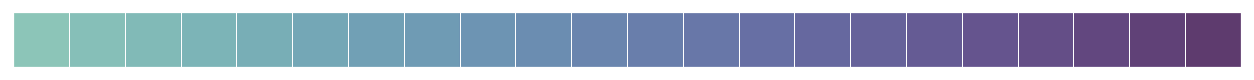

In [41]:
cmap = sns.cubehelix_palette(22, start=1,rot=-.80, dark = .3, light=.7)
sns.palplot(cmap)

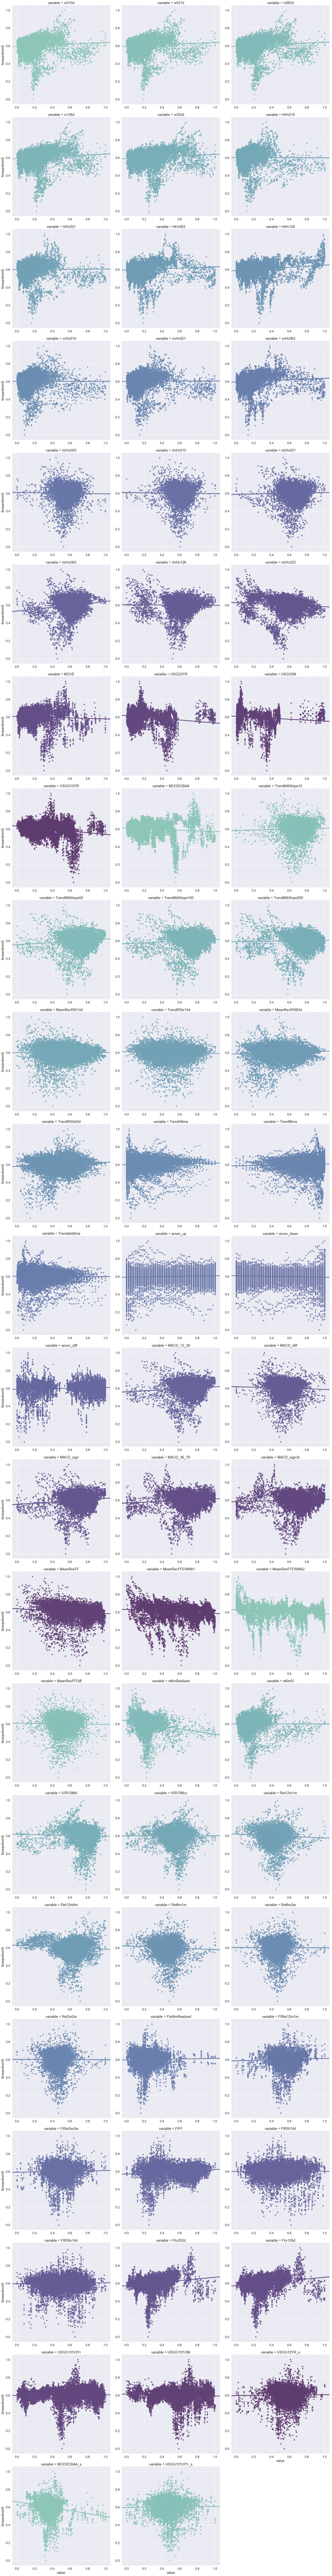

In [42]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(40,40)})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
g = sns.FacetGrid(mmdata, col="variable", hue="variable",
                  palette=cmap,
                  height = 8, 
                  col_wrap = 3,
                  sharex=False, 
                  sharey=False,
                  margin_titles=True)
g.map(sns.regplot,'value', 'forwardmmS')
g.savefig('plots/AbsoluteReturnsScatterPlots-3M.png')

In [43]:
df_stats = pd.DataFrame([], columns = ['pval', 'rsquared', 'coef'])
for i in mmdata.variable.unique():
    form = "forwardmmS ~ "+str(i)
    model = ols(form, mdata).fit()
    df_stats.loc[i, :] = [np.round(model.pvalues[1],4), 
                              np.round(model.rsquared, 4), 
                              np.round(model.params[1],3)]

df_stats.sort_values(by=['rsquared'], ascending = False)

pval rsquared   coef
USGG10YR              0    0.051 -0.093
USGG2YR               0   0.0396 -0.082
FIiv126d              0   0.0323  0.093
st6mRealized          0   0.0314  -0.15
FIiv252d              0   0.0304  0.094
MOODCBAA_s            0   0.0266 -0.165
MeanRevFFEWMA2        0   0.0252 -0.044
hlHv126               0   0.0231  0.061
rtnHv063              0   0.0201  0.107
FIFF                  0   0.0188   0.05
MeanRevFFEWMA1        0   0.0171 -0.045
USGG3M                0   0.0167 -0.054
MeanRevFF             0   0.0164 -0.053
MOODCBAA              0    0.011  -0.04
MACD_sign             0    0.011  0.067
iv252d                0   0.0108  0.046
iv126d                0   0.0099  0.049
TrendRSIs63d          0    0.009  0.045
TrendMASlope50        0   0.0083  0.061
iv063d                0   0.0078  0.047
rtnHv252              0   0.0076 -0.044
MACD_36_78            0   0.0075  0.045
MACD_12_26            0   0.0066  0.055
ccHv063               0    0.006   0.04
iv021d                0   0.0058  0.042
aroon_diff            0   0.0058  0.019
TrendMASlope100       0   0.0053  0.044
iv010d                0   0.0052  0.041
aroon_down            0   0.0051 -0.016
hlHv063               0    0.005  0.035
...                 ...      ...    ...
TrendhBma             0   0.0018  0.018
TrendlBma             0   0.0016  0.018
TrendRSIs14d          0   0.0016 -0.019
MACD_diff             0   0.0013  -0.03
IVRV3Mhl         0.0001    0.001 -0.021
FIRet12m1m       0.0001    0.001  0.025
TrendMASlope10   0.0003   0.0009  0.026
TrendMASlope200  0.0043   0.0006  0.012
USGG10Yr2Yr      0.0026   0.0006  0.007
FIRet3m2w        0.0029   0.0006  0.019
FIRSIs14d        0.0057   0.0005  0.011
rtnHv021         0.0125   0.0004  0.018
FIst6mRealized   0.0114   0.0004  0.016
MeanRevFFDiff    0.0583   0.0003 -0.014
USGG10Yr2Yr_s    0.1204   0.0002   0.01
rtnHv005          0.071   0.0002 -0.016
TrendabsBma      0.3806   0.0001 -0.003
ccHv021          0.3543   0.0001  0.004
hlHv021          0.3164   0.0001  0.005
rtnHv010         0.2043   0.0001 -0.011
rtnHv126           0.25   0.0001 -0.006
USGG10YR_s       0.1481   0.0001  0.009
Ret6m2w          0.7479        0 -0.003
MeanRevRSI14d    0.8486        0  0.001
IVRV3Mcc         0.8675        0  0.001
FIRSI14d         0.7926        0  0.001
st6mIV           0.9262        0 -0.001
ccHv010          0.8596        0  0.001
hlHv010          0.7267        0 -0.002
Ret3m2w          0.7479        0 -0.003

[68 rows x 3 columns]

# Relative Return Features Plot / T Stat

- Below We made the Same plot/Output for Relative to SPY returns

In [73]:
rretwindow = 'RelrtnFv063'
cols = ['ticker', 'period', 'dn', 'open', 'high', 'low', 'close',
        rretwindow, 'Side'+rretwindow, 'RelccRtn', 'rtnFv001', 'tcrreturn', 'tcreturn',
        'iv010d', 'iv021d','iv063d','iv126d','iv252d',
        'hlHv010','hlHv021', 'hlHv063','hlHv126',
        'ccHv010', 'ccHv021','ccHv063',
        'rtnHv005', 'rtnHv010', 'rtnHv021', 'rtnHv063', 'rtnHv126', 'rtnHv252',
        'RelrtnHv010', 'RelrtnHv021', 'RelrtnHv063','RelrtnHv126','RelrtnHv252',
        'MOVE', 'USGG2YR', 'USGG3M', 'USGG10YR', 'MOODCBAA']
sides = df[cols]

#for column in sides:
 #   if sides[column].isnull().any():
  #      print('{0} has {1} null values'.format(column, sides[column].isnull().sum()))
sides = sides.dropna()
scaler = MinMaxScaler()
sides['forwardmmS'] = scaler.fit_transform(sides[rretwindow].values.reshape(-1,1))
scaler = StandardScaler()
sides['forwardstdS'] = scaler.fit_transform(sides[rretwindow].values.reshape(-1,1))
sides.index = sides['period']
sides.head()

ticker     period    dn       open       high        low  \
period                                                                
2007-01-04    IWM 2007-01-04  2775  77.889999  78.589996  77.279999   
2007-01-05    IWM 2007-01-05  2776  78.019997  78.366302  76.699997   
2007-01-08    IWM 2007-01-08  2777  76.949997  77.300003  76.230003   
2007-01-09    IWM 2007-01-09  2778  77.120003  77.309998  76.190002   
2007-01-10    IWM 2007-01-10  2779  76.760002  77.750000  76.570000   

                close  RelrtnFv063  SideRelrtnFv063  RelccRtn     ...       \
period                                                            ...        
2007-01-04  78.370003     0.000096                1  0.000564     ...        
2007-01-05  76.730003     0.000308                1 -0.013140     ...        
2007-01-08  76.430000     0.000470                1 -0.008532     ...        
2007-01-09  77.150002     0.000274                1  0.010226     ...        
2007-01-10  77.750000     0.000240                1  0.004420     ...        

            RelrtnHv063  RelrtnHv126  RelrtnHv252  MOVE  USGG2YR  USGG3M  \
period                                                                     
2007-01-04     0.000538    -0.000163     0.000089  72.0   4.6913  5.0297   
2007-01-05     0.000133    -0.000242     0.000034  67.4   4.7494  5.0380   
2007-01-08    -0.000173    -0.000243    -0.000019  64.3   4.7744  5.0477   
2007-01-09     0.000051    -0.000148     0.000008  61.8   4.7912  5.0727   
2007-01-10     0.000010    -0.000147     0.000009  62.2   4.8080  5.0823   

            USGG10YR  MOODCBAA  forwardmmS  forwardstdS  
period                                                   
2007-01-04    4.6024      6.24    0.419428     0.154648  
2007-01-05    4.6442      6.25    0.431269     0.356545  
2007-01-08    4.6522      6.25    0.440310     0.510688  
2007-01-09    4.6542      6.25    0.429375     0.324249  
2007-01-10    4.6843      6.28    0.427469     0.291747  

[5 rows x 43 columns]

In [83]:
mdatar.to_csv('mdatar.csv')

In [82]:
mdatar.columns

Index(['iv010d', 'iv021d', 'iv063d', 'iv126d', 'iv252d', 'hlHv010', 'hlHv021',
       'hlHv063', 'hlHv126', 'ccHv010', 'ccHv021', 'ccHv063', 'rtnHv005',
       'rtnHv010', 'rtnHv021', 'rtnHv063', 'rtnHv126', 'rtnHv252',
       'RelrtnHv010', 'RelrtnHv021', 'RelrtnHv063', 'RelrtnHv126',
       'RelrtnHv252', 'MOVE', 'USGG2YR', 'USGG3M', 'USGG10YR', 'MOODCBAA',
       'TrendMASlope10', 'TrendMASlope50', 'TrendMASlope100',
       'TrendMASlope200', 'MeanRevRSI14d', 'TrendRSIs14d', 'MeanRevRSI63d',
       'TrendRSIs63d', 'TrendhBma', 'TrendlBma', 'TrendabsBma', 'aroon_up',
       'aroon_down', 'aroon_diff', 'MACD_12_26', 'MACD_diff', 'MACD_sign',
       'MACD_36_78', 'MACD_sign3x', 'MeanRevFF', 'MeanRevFFEWMA1',
       'MeanRevFFEWMA2', 'MeanRevFFDiff', 'st6mRealized', 'st6mIV', 'IVRV3Mhl',
       'IVRV3Mcc', 'Ret12m1m', 'Ret12m6m', 'Ret6m1m', 'Ret6m2w', 'Ret3m2w',
       'FIst6mRealized', 'FIRet12m1m', 'FIRet3m2w', 'FIFF', 'FIRSI14d',
       'FIRSIs14d', 'FIiv252d', 'FIiv126d', 'USGG10Yr2

In [81]:
cols = list(mmdatar['variable'].unique())
with open('fnamesR.txt', 'w') as f:
    for s in cols:
        f.write(s + '\n')

In [37]:
!jupyter nbconvert --to html EDA_s0.ipynb

[NbConvertApp] Converting notebook EDA_s0.ipynb to html
[NbConvertApp] Writing 15601814 bytes to EDA_s0.html
